In [123]:
import os
import re

for file in os.listdir('.'):
    if file.endswith('.csv'):
        print (file)
print('-----')
for file in os.listdir('.'):
    if file.startswith('data'):
        print(file)
print ('-----')
for file in os.listdir('.'):
    if 'data' in file:
        print(file)
print ('------')
pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
for file in os.listdir('.'):
    if pattern.search(file):
        print(file)

data.csv
datapersonas.csv
dataset.csv
depos.csv
dffix3.csv
inmuebles.csv
inmuebles_limpios.csv
-----
data.csv
data.json
data.xml
datapersonas - Copy.npz
datapersonas.csv
datapersonas.npz
dataset.csv
-----
2024-05-10-data-Copy1.txt
2024-05-10-data-Copy2.txt
2024-05-10-data.txt
data.csv
data.json
data.xml
datapersonas - Copy.npz
datapersonas.csv
datapersonas.npz
dataset.csv
------
2024-05-10-data-Copy1.txt
2024-05-10-data-Copy2.txt
2024-05-10-data.txt


In [145]:
import pandas as pd
path = '.'
df_unificado = pd.DataFrame()
lista_archivos = ['dataset.csv','data.csv','datapersonas.csv']

for file in lista_archivos:
    data = pd.read_csv(os.path.join(path,file))
    data['Fuente'] = file
    # Transformacion con columnas que no existen
    # data['Op'] = data['Age']*data['Salario']
    df_unificado = pd.concat([df_unificado,data])
print(df_unificado.info())
df_unificado['Op'] = df_unificado['Age']+df_unificado['Salario']
df_unificado.to_csv('df_unificado_2.csv')

<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 287
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombres               285 non-null    object 
 1   Telefonos             285 non-null    object 
 2   Salario               285 non-null    object 
 3   Pesos                 285 non-null    object 
 4   Alturas               285 non-null    object 
 5   Nacionalidades        285 non-null    object 
 6   Grupo Sanguineos      285 non-null    object 
 7   Fechas de Nacimiento  285 non-null    object 
 8   Fuente                592 non-null    object 
 9   Name                  291 non-null    object 
 10  Age                   291 non-null    float64
 11  Height                291 non-null    float64
 12  Weight                292 non-null    float64
dtypes: float64(3), object(10)
memory usage: 64.8+ KB
None


In [159]:
import pandas as pd
from datetime import datetime
from sqlalchemy import create_engine

# Configurar SQL Alchemy
sqlite_engine = create_engine("sqlite:///bdpersonas.bd")
path = '.'
df_unificado = pd.DataFrame()
lista_archivos = ['dataset.csv','data.csv','datapersonas.csv']
time_now = datetime.now().strftime('%Y%m%dT%H%M%S')
for file in lista_archivos:
    data = pd.read_csv(os.path.join(path,file))
    data['Fuente'] = file
    data['HoraCarga'] = time_now
    df_unificado = pd.concat([df_unificado,data]) # metodo que concatena la informacion
print(df_unificado.info())
# Guardar en BD
df_unificado.to_sql('personas',sqlite_engine, if_exists='replace', index=False)
print ('Datos enviados al a BD')


<class 'pandas.core.frame.DataFrame'>
Index: 592 entries, 0 to 287
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Nombres               285 non-null    object 
 1   Telefonos             285 non-null    object 
 2   Salario               285 non-null    object 
 3   Pesos                 285 non-null    object 
 4   Alturas               285 non-null    object 
 5   Nacionalidades        285 non-null    object 
 6   Grupo Sanguineos      285 non-null    object 
 7   Fechas de Nacimiento  285 non-null    object 
 8   Fuente                592 non-null    object 
 9   HoraCarga             592 non-null    object 
 10  Name                  291 non-null    object 
 11  Age                   291 non-null    float64
 12  Height                291 non-null    float64
 13  Weight                292 non-null    float64
dtypes: float64(3), object(11)
memory usage: 69.4+ KB
None
Datos enviados al a BD


# Parte de matplotlib

# Manipulacion de la libreria

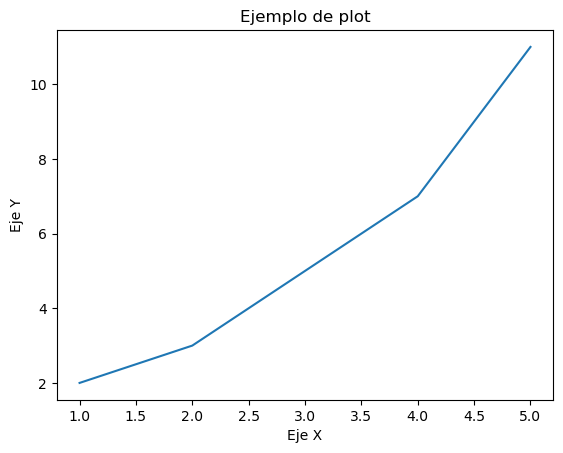

In [17]:
import matplotlib.pyplot as plt

# Datos de ejemplos
x = [1,2,3,4,5]
y = [2,3,5,7,11]

# Crear el grafico
plt.plot(x,y)
plt.title("Ejemplo de plot")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show()



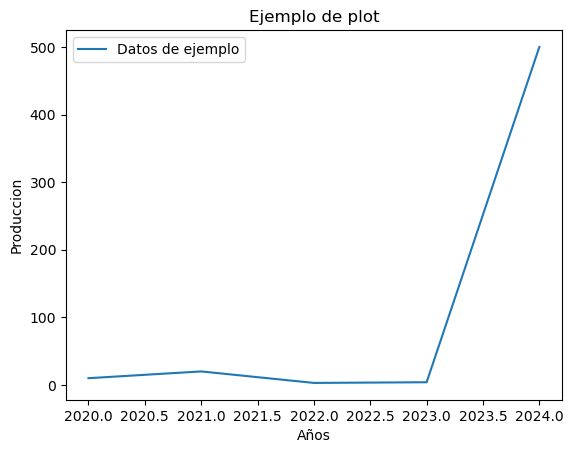

In [29]:
import matplotlib.pyplot as plt

# Datos de ejemplos
years = [2020,2021,2022,2023,2024]
produccion = [10,20,3,4,500]

# Crear el grafico
plt.plot(years,produccion)
plt.title("Ejemplo de plot")
plt.xlabel("Años")
plt.ylabel("Produccion")
plt.legend(['Datos de ejemplo'])
plt.show()

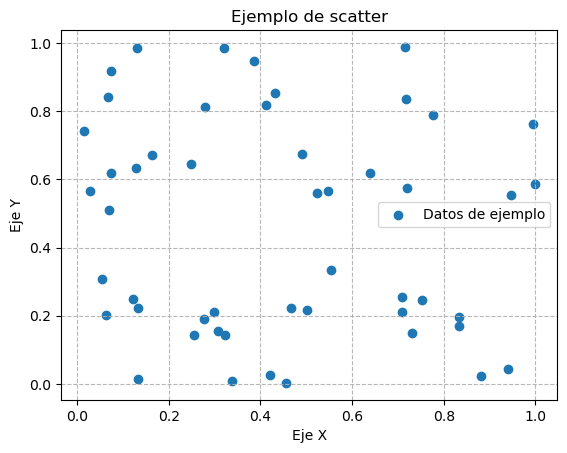

In [61]:
# Grafico de dispercion
import numpy as np
x = np.random.rand(50)
y = np.random.rand(50)

# Crear el grafico
plt.scatter(x,y)
plt.title("Ejemplo de scatter")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend(['Datos de ejemplo'])
plt.grid(axis='x',linestyle='--',alpha=0.9)
plt.grid(axis='y',linestyle='--',alpha=0.9)
plt.show()

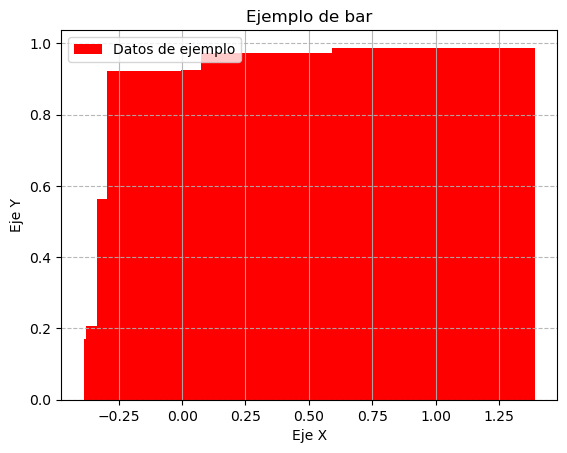

In [75]:
# Grafico de dispercion
import numpy as np
x = np.random.rand(50)
y = np.random.rand(50)

# Crear el grafico
plt.bar(x,y, color="#FF0000")
plt.title("Ejemplo de bar")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend(['Datos de ejemplo'])
plt.grid(axis='x',linestyle='-',alpha=0.9)
plt.grid(axis='y',linestyle='--',alpha=0.9)
plt.show()

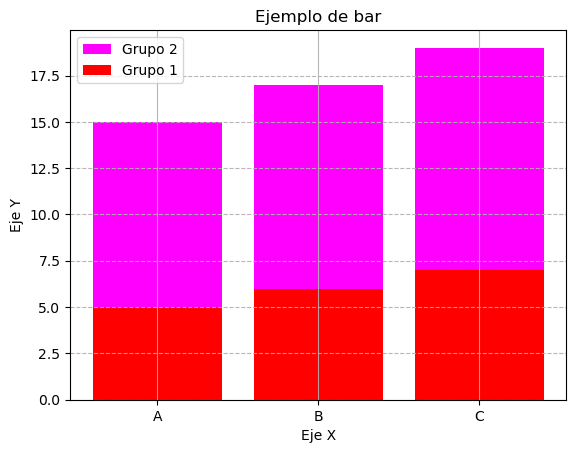

In [115]:
# Grafico de dispercion
import numpy as np
x = ['A','B','C']
y = [5,6,7]
y2 = [10,11,12]

# Crear el grafico

plt.bar(x,y2, color="#FF00FF",label="Grupo 2",bottom=y)
plt.bar(x,y, color="#FF0000",label="Grupo 1")
plt.title("Ejemplo de bar")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.legend()
plt.grid(axis='x',linestyle='-',alpha=0.9)
plt.grid(axis='y',linestyle='--',alpha=0.9)
plt.show()

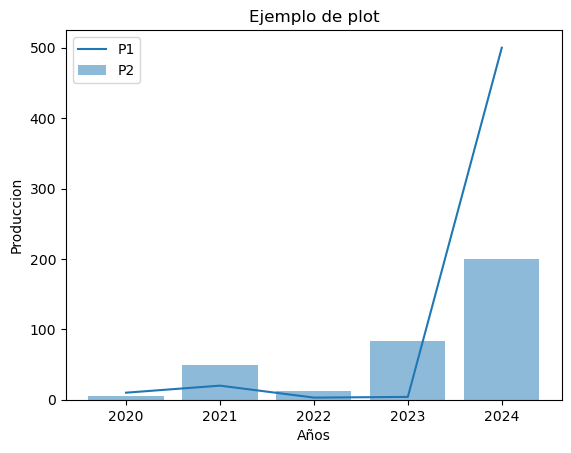

In [145]:
import matplotlib.pyplot as plt

# Datos de ejemplos
years = [2020,2021,2022,2023,2024]
produccion = [10,20,3,4,500]
produccion2 = [5,50,12,84,200]
# Crear el grafico
plt.plot(years,produccion,label="P1",alpha=1)
plt.bar(years,produccion2,label="P2",alpha=0.5)
#plt.gca().invert_yaxis()
#plt.gca().invert_xaxis()

plt.title("Ejemplo de plot")
plt.xlabel("Años")
plt.ylabel("Produccion")
plt.legend()
plt.show()

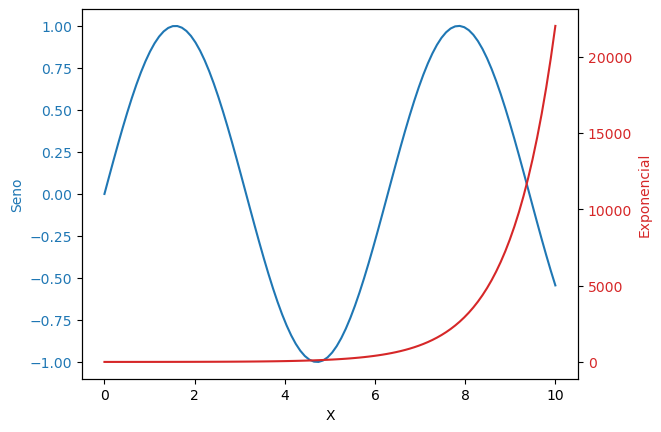

In [147]:
x = np.linspace(0,10,100)
y1 = np.sin(x)
y2 = np.exp(x)


# Concepto que es Subplot.
fig, ax1 = plt.subplots()
color = 'tab:blue'
ax1.set_xlabel('X')
ax1.set_ylabel('Seno', color=color)
ax1.plot(x,y1,color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Exponencial', color=color)
ax2.plot(x,y2,color=color)
ax2.tick_params(axis='y',labelcolor=color)

plt.show()

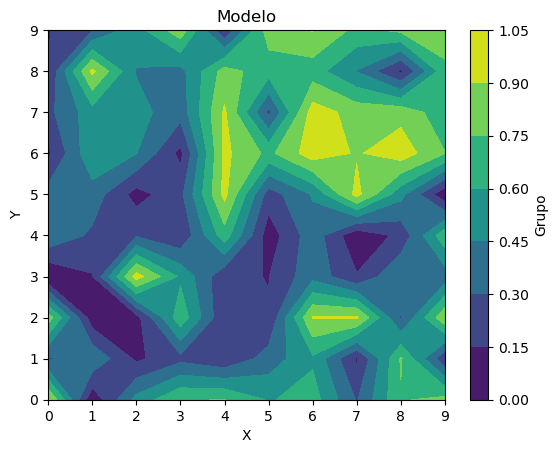

In [155]:
import numpy as np

x,y = np.meshgrid(range(10),range(10))
z = np.random.rand(10,10)

plt.contourf(x,y,z, cmap='viridis')
plt.colorbar(label='Grupo')
plt.title('Modelo')
plt.xlabel('X')
plt.ylabel("Y")
plt.show()

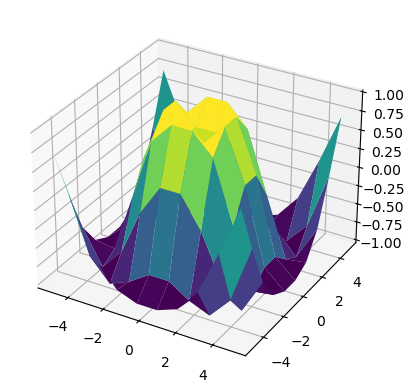

In [167]:
x = np.linspace(-5,5,10)
y = np.linspace(-5,5,10)

X, Y = np.meshgrid(x,y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X,Y,Z,cmap='viridis')
plt.show()


In [169]:
import requests

# URL del archivo CSV
url = 'https://raw.githubusercontent.com/staskarasev/DeposBA/refs/heads/master/depos.csv'

# Enviar una solicitud GET a la URL
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Guardar el contenido del archivo
    with open('inmuebles.csv', 'wb') as file:
        file.write(response.content)
    print("Archivo descargado y guardado como 'inmuebles.csv'.")
else:
    print("Error al descargar el archivo:", response.status_code)


Archivo descargado y guardado como 'inmuebles.csv'.


In [173]:
import pandas as pd

file_path = "inmuebles.csv"
data = pd.read_csv(file_path)
print(data.head())
print(data.info())

   Unnamed: 0 rooms              age     district bathrooms  \
0           0     2           Frente     Belgrano         0   
1           1     4           Frente    Caballito         4   
2           2     4               12      Palermo         3   
3           3     2  En construcción     Belgrano         1   
4           4     3     Muy luminoso    Monserrat         2   

                                         information parking_lots bedrooms  \
0  \n\t\t\n\t\t\n\t\t,Cantidad dormitorios: ,2,\n...            2        1   
1  \n\t\t\n\t\t\n\t\t,Cantidad pisos en edificio:...            1        3   
2  \n\t\t\n\t\t\n\t\t,Cantidad dormitorios: ,3,\n...            1        3   
3  \n\t\t\n\t\t\n\t\t,Cantidad dormitorios: ,1,\n...            0        1   
4  \n\t\t\n\t\t\n\t\t,Luz ,\n\t\t\n\t\t\n\t,\n\t\...            2       40   

   expenses                                            name     price  \
0   $ 7.000              Departamento · 102m² · 3 Ambientes  298000.0   
1   $ 

In [9]:
print(data.isnull().sum())

Unnamed: 0           0
rooms                4
age               3044
district             0
bathrooms           12
information        279
parking_lots        81
bedrooms           567
expenses          6610
name                 0
price                0
covered_square       0
total_square         0
toilets           1847
dtype: int64


In [37]:
print(data['total_square'])

0        102
1        154
2        190
3         51
4         37
        ... 
16629     40
16630     42
16631     55
16632     35
16633     45
Name: total_square, Length: 13741, dtype: int64


In [13]:
print(data.duplicated().sum())

0


In [15]:
print(data.describe())

         Unnamed: 0         price  total_square
count  16634.000000  1.663400e+04  16634.000000
mean    8316.500000  3.996186e+05     96.160394
std     4801.966524  1.453564e+06     95.897557
min        0.000000  0.000000e+00      0.000000
25%     4158.250000  1.250000e+05     47.000000
50%     8316.500000  1.912625e+05     71.000000
75%    12474.750000  3.490000e+05    114.000000
max    16633.000000  1.111111e+08   5425.000000


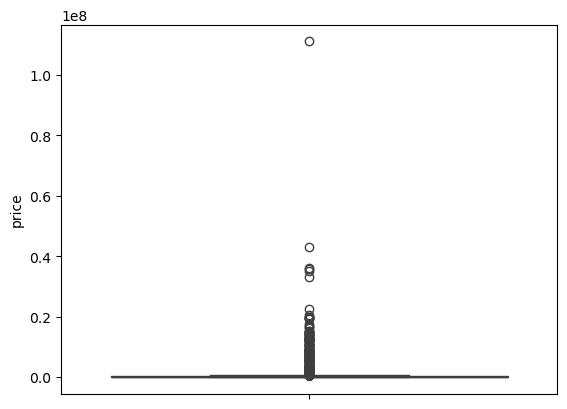

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data['price'])
plt.show()

In [19]:
data = data.drop_duplicates()

In [23]:
data_filled = data.copy()
data_filled['price'] = data_filled['price'].fillna(data_filled['price'].median())

In [27]:
data_removed = data.copy()
data_removed = data_removed.dropna(thresh=len(data.columns)-2) 

In [59]:
from decimal import Decimal
data = data_removed.copy()

data['information'] = data['information'].str.lower()
data['information'] = data['information'].str.strip()
data['d_price'] = data['price'].apply(lambda x: Decimal(x))
print (data['d_price'])
data = data[(data['d_price'] > 10000) & (data['d_price'] < 1000000)]
data = data[(data['total_square'] > 0)]

0        298000
1        490000
2        800000
3        152500
4         85000
          ...  
16629     78000
16630     75000
16631    300000
16632    134000
16633    155000
Name: d_price, Length: 15018, dtype: object


In [61]:
data['price_per_sqm'] = data['d_price'] / data['total_square']

In [63]:
data.to_csv('inmuebles_limpios.csv', index=False)

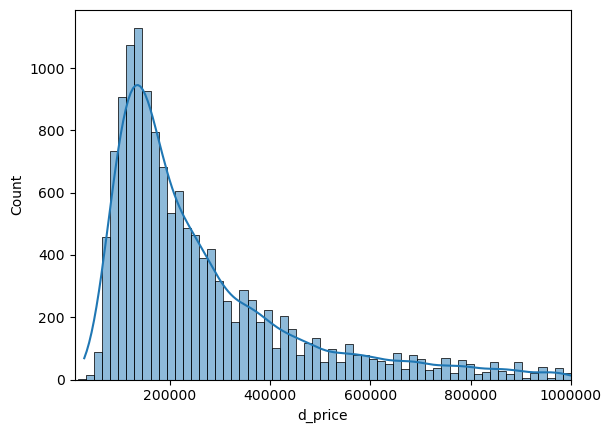

(10000.0, 1000000.0)


In [101]:
hist_plot = sns.histplot(data['d_price'],kde=True,binrange=(0, 1_000_000))
plt.ticklabel_format(style='plain', axis='x') 
plt.ticklabel_format(style='plain', axis='y')
plt.xlim(10_000,1_000_000)
plt.show()
print (hist_plot.get_xlim())

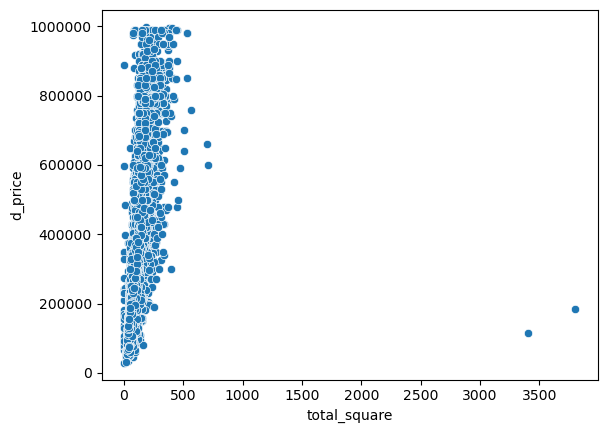

In [103]:
sns.scatterplot(x='total_square',y='d_price', data=data)
plt.ticklabel_format(style='plain', axis='x') 
plt.ticklabel_format(style='plain', axis='y')
plt.show()

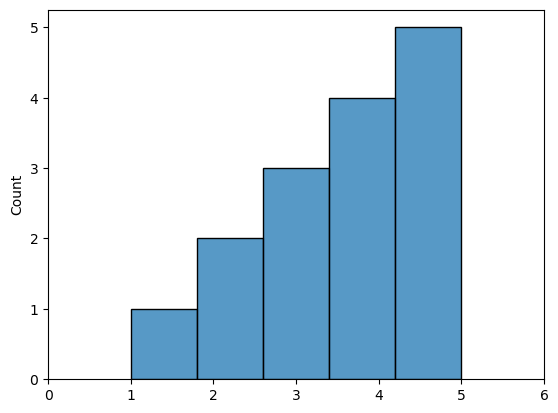

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Datos de ejemplo
datos = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5]

# Crear el histograma con Seaborn
sns.histplot(datos)

# Ajustar los límites del eje X usando Matplotlib
plt.xlim(0, 6)

# Mostrar el gráfico
plt.show()

